# Project 1: SAT & ACT Analysis

## Problem Statement

Based on changes in state SAT and ACT participation rates and performance, which states should be targeted to raise SAT participation rates?

## Executive Summary

The college admissions tests landscape is fiercely competitive between the SAT and ACT. This project uses data from the 2017 and 2018 SAT and ACT tests across the US states to derive insights into participation rates through student performance visualization and statistical inferences.

It will also form opinions on the reasons for state participation in college admissions tests and give recommendations on driving SAT participation in specific states.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Data Dictionary for Final Dataframe](#Data-Dictionary-for-Final-Dataframe)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid")

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat_df = pd.read_csv('../data/sat_2017.csv')
act_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: These are the educational scores of US residents for the SAT and ACT, two tests widely used for college admissions in the United States. The SAT results are grouped by the 50 US states and the District of Columbia, for a total of 51 entries, while the ACT results are grouped in the same manner with an additional "National" result, for a total of 52 entries. The data includes participation rates of states, scores of individual sections of each test, and total scores.

#### 4a. Does the data look complete? 

Answer: The SAT scores should have a row for national average. If that data is not available, we will have to exclude the ACT national average as there is no meaningful data to compare it with.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: Minimum/maximum score for individual sections of SAT is 200/800.  Minimum/maximum score for individual sections of ACT is 1/36. The maximum total score for SAT is 1600 while the maximum total score of ACT is 36.

The SAT math score for Maryland is suspiciously low and upon checking with the source, it was discovered that the score was entered errorneously as 52 instead of 524.

Similarly, the ACT science score for Maryland is also much lower than usual. Upon checking with the source, it was discovered that the score was entered errorneously as 2.3 instead of 23.2.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
sat_df['Math'].replace(52, 524, inplace=True)
act_df['Science'].replace(2.3, 23.2, inplace=True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#code
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation in both dataframes are objects (for example 60%) and should be changed to floats (0.60). The "composite" column in the ACT dataframe should also be changed from object to float. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#code
def object_to_float(i):
    return float(i.strip('%'))/100

sat_df['Participation'] = sat_df['Participation'].apply(object_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
#code
act_df['Participation'] = act_df['Participation'].apply(object_to_float)

In [10]:
act_df['Composite'][51] 

'20.2x'

In [11]:
act_df['Composite'].replace('20.2x', '23.2', inplace=True)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
#code
act_df['Composite'] = act_df['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [13]:
#Code:
act_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [14]:
sat_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#code

sat_df.rename(columns={'State': 'state', 
                       'Participation': '2017_sat_participation', 
                       'Evidence-Based Reading and Writing': '2017_sat_read_write', 
                      'Math': '2017_sat_math', 
                      'Total': '2017_sat_total'}, inplace=True)

In [16]:
act_df.rename(columns={'State': 'state', 
                       'Participation': '2017_act_participation', 
                       'English': '2017_act_english', 
                      'Math': '2017_act_math', 
                      'Reading': '2017_act_reading', 
                      'Science': '2017_act_science', 
                      'Composite': '2017_act_composite'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

## Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2017 SAT|US state where SAT data comes from, including DC.|
|2017_sat_participation|float|2017 SAT|Participation rate in SAT within state.|
|2017_sat_read_write|int|2017 SAT|Evidence-based Reading and Writing section of SAT, with score between 200 and 800.|
|2017_sat_math|int|2017 SAT|Math section of SAT, with score between 200 and 800.|
|2017_sat_total|int|2017 SAT|Total score of SAT, combining EBRW and Math sections, for total score between 400 and 1600.|
|2017_act_participation|float|2017 ACT|Participation rate in ACT within state.|
|2017_act_english|float|2017 ACT|English section of ACT, with score between 1 and 36.|
|2017_act_math|float|2017 ACT|Math section of ACT, with score between 1 and 36.|
|2017_act_reading|float|2017 ACT|Reading section of ACT, with score between 1 and 36.|
|2017_act_science|float|2017 ACT|Science section of ACT, with score between 1 and 36.|
|2017_act_composite|float|2017 ACT|Composite score of ACT averaging xcores from four subject sections, with score between 1 and 36.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code 
act_df.drop([0],axis=0,inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#Code:
combined_2017_df = pd.merge(sat_df, act_df, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#code

combined_2017_df.to_csv(r'/Users/ziliang/Desktop/GA-projects/project_1/ga-project-1/data/combined_2017.csv') 

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

After manual extraction of 2018 SAT and ACT results into two separate CSV files, read in 2018 results into two dataframes.

In [20]:
act_2018_df = pd.read_csv('../data/act_2018.csv')

sat_2018_df = pd.read_csv('../data/sat_2018.csv')

Convert 'Participation' columns of both dataframes into float using earlier defined function.

In [21]:
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(object_to_float)

act_2018_df['Participation'] = act_2018_df['Participation'].apply(object_to_float)

Check data types of 2018 dataframes are float or int for numerical columns.

In [22]:
sat_2018_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [23]:
act_2018_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

Rename 2018 dataframes in the same format as 2017 dataframes.

In [24]:
sat_2018_df.rename(columns={'State': 'state', 
                       'Participation': '2018_sat_participation', 
                       'Evidence-Based Reading and Writing': '2018_sat_read_write', 
                      'Math': '2018_sat_math', 
                      'Total': '2018_sat_total'}, inplace=True)

act_2018_df.rename(columns={'State': 'state', 
                       'Participation': '2018_act_participation', 
                       'English': '2018_act_english', 
                      'Math': '2018_act_math', 
                      'Reading': '2018_act_reading', 
                      'Science': '2018_act_science', 
                      'Composite': '2018_act_composite'}, inplace=True)

Drop extra 'National' row from ACT 2018 dataframe.

In [25]:
act_2018_df.drop([0],axis=0,inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [26]:
combined_2017_sat_2018_df = pd.merge(combined_2017_df, sat_2018_df, on='state')

final_df = pd.merge(combined_2017_sat_2018_df, act_2018_df, on='state')

In [27]:
final_df.to_csv(r'/Users/ziliang/Desktop/GA-projects/project_1/ga-project-1/data/final.csv') 

## Data Dictionary for Final Dataframe

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2017 SAT|US state where SAT data comes from, including DC.|
|2017_sat_participation|float|2017 SAT|Participation rate in SAT within state.|
|2017_sat_read_write|int|2017 SAT|Evidence-based Reading and Writing section of SAT, with score between 200 and 800.|
|2017_sat_math|int|2017 SAT|Math section of SAT, with score between 200 and 800.|
|2017_sat_total|int|2017 SAT|Total score of SAT, combining EBRW and Math sections, for total score between 400 and 1600.|
|2017_act_participation|float|2017 ACT|Participation rate in ACT within state.|
|2017_act_english|float|2017 ACT|English section of ACT, with score between 1 and 36.|
|2017_act_math|float|2017 ACT|Math section of ACT, with score between 1 and 36.|
|2017_act_reading|float|2017 ACT|Reading section of ACT, with score between 1 and 36.|
|2017_act_science|float|2017 ACT|Science section of ACT, with score between 1 and 36.|
|2017_act_composite|float|2017 ACT|Composite score of ACT averaging xcores from four subject sections, with score between 1 and 36.|
|2018_sat_participation|float|2018 SAT|Participation rate in SAT within state.|
|2018_sat_read_write|int|2018 SAT|Evidence-based Reading and Writing section of SAT, with score between 200 and 800.|
|2018_sat_math|int|2018 SAT|Math section of SAT, with score between 200 and 800.|
|2018_sat_total|int|2018 SAT|Total score of SAT, combining EBRW and Math sections, for total score between 400 and 1600.|
|2018_act_participation|float|2018 ACT|Participation rate in ACT within state.|
|2018_act_english|float|2018 ACT|English section of ACT, with score between 1 and 36.|
|2018_act_math|float|2018 ACT|Math section of ACT, with score between 1 and 36.|
|2018_act_reading|float|2018 ACT|Reading section of ACT, with score between 1 and 36.|
|2018_act_science|float|2018 ACT|Science section of ACT, with score between 1 and 36.|
|2018_act_composite|float|2018 ACT|Composite score of ACT averaging xcores from four subject sections, with score between 1 and 36.|


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [28]:
#Code:
final_df.describe()

,2017_sat_participation,2017_sat_read_write,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_read_write,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_english,2018_act_math,2018_act_reading,2018_act_science,2018_act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.578431,0.466275,567.294118,557.254902,1124.666667,0.616471,20.988235,21.125490,22.033333,21.341176,21.498039
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.025173,0.380142,45.317676,48.887562,93.868561,0.340810,2.446356,2.035765,2.164132,1.870206,2.117686
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,497.000000,480.000000,977.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,535.000000,521.500000,1062.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,547.000000,1099.000000,0.660000,20.200000,20.700000,21.700000,21.100000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.795000,616.500000,600.500000,1220.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [29]:
#code

def stdev(list_of_numbers):
    mean = sum(list_of_numbers)/len(list_of_numbers)
    mean_diff_squared = []
    
    for number in list_of_numbers:
        mean_diff_squared.append((number-mean)**2)
        
    return (sum(mean_diff_squared)/(len(list_of_numbers)))**0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [30]:
#Code:

{col.name:stdev(col) for col in 
 [final_df[i] for i in final_df.columns if 
  (final_df[i].dtype=='float64') or (final_df[i].dtype=='int64')]}

{'2017_sat_participation': 0.3492907076664507,
 '2017_sat_read_write': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 0.3182417575123181,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_composite': 2.005220023670592,
 '2018_sat_participation': 0.3763965409204987,
 '2018_sat_read_write': 44.87118561762388,
 '2018_sat_math': 48.40589946919447,
 '2018_sat_total': 92.94372462792965,
 '2018_act_participation': 0.33745194881997503,
 '2018_act_english': 2.4222536143202795,
 '2018_act_math': 2.015707255555717,
 '2018_act_reading': 2.14280983452291,
 '2018_act_science': 1.851779903767018,
 '2018_act_composite': 2.0968220768561987}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

They don't match up to the output from pandas `describe`, because pandas `describe` uses the standard deviation formula for a sample, while my standard deviation function uses the formula for a population. The results matches numpy's `std` method (as shown below, suggesting that numpy's `std` uses the formula for a population. 

In [31]:
{col.name:np.std(col) for col in 
 [final_df[i] for i in final_df.columns if 
  (final_df[i].dtype=='float64') or (final_df[i].dtype=='int64')]}

{'2017_sat_participation': 0.3492907076664507,
 '2017_sat_read_write': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 0.3182417575123181,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_composite': 2.005220023670592,
 '2018_sat_participation': 0.3763965409204987,
 '2018_sat_read_write': 44.87118561762388,
 '2018_sat_math': 48.40589946919447,
 '2018_sat_total': 92.94372462792965,
 '2018_act_participation': 0.33745194881997503,
 '2018_act_english': 2.4222536143202795,
 '2018_act_math': 2.015707255555717,
 '2018_act_reading': 2.14280983452291,
 '2018_act_science': 1.851779903767018,
 '2018_act_composite': 2.0968220768561987}

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [32]:
#2017 SAT highest participation rates

final_df.sort_values(by=['2017_sat_participation'],ascending=False)[['state', '2017_sat_participation']].head()

,state,2017_sat_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [33]:
#2017 SAT lowest participation rates

final_df.sort_values(by=['2017_sat_participation'])[['state', '2017_sat_participation']].head()

,state,2017_sat_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


#### 2017 SAT participation rates

The District of Columbia, Michigan, Connecticut, and Delaware have the highest participation rates at 100%.

North Dakota, Mississippi, and Iowa have the lowest participation rates at 2%.

In [34]:
#2018 SAT highest participation rates

final_df.sort_values(by=['2018_sat_participation'],ascending=False)[['state', '2018_sat_participation']].head(6)

,state,2018_sat_participation
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99


In [35]:
#2018 SAT lowest participation rates

final_df.sort_values(by=['2018_sat_participation'])[['state', '2018_sat_participation']].head()

,state,2018_sat_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


#### 2018 SAT participation rates

Colorado, Connecticut, Delaware, Michigan, and Idaho have the highest participation rates at 100%.

North Dakota has the lowest participation rates at 2%.

In [36]:
#2017 ACT highest participation rates

final_df.sort_values(by=['2017_act_participation'],ascending=False)[['state', '2017_act_participation']].head(18)

,state,2017_act_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


In [37]:
#2017 ACT lowest participation rates

final_df.sort_values(by=['2017_act_participation'])[['state', '2017_act_participation']].head()

,state,2017_act_participation
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


#### 2017 ACT participation rates

Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, and Arkansas have the highest participation rates at 100%.

Maine has the lowest participation rate at 8%.

In [38]:
#2018 ACT highest participation rates

final_df.sort_values(by=['2018_act_participation'],ascending=False)[['state', '2018_act_participation']].head(18)

,state,2018_act_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


In [39]:
#2018 ACT lowest participation rates

final_df.sort_values(by=['2018_act_participation'])[['state', '2018_act_participation']].head()

,state,2018_act_participation
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


#### 2018 ACT participation rates

Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, and Arkansas have the highest participation rates at 100%.

Maine has the lowest participation rate at 7%.

In [40]:
#2017 SAT higest total score

final_df.sort_values(by=['2017_sat_total'],ascending=False)[['state', '2017_sat_total']].head()

,state,2017_sat_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [41]:
#2017 SAT lowest total score

final_df.sort_values(by=['2017_sat_total'])[['state', '2017_sat_total']].head()

,state,2017_sat_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


#### 2017 SAT total scores

Minnesota has the highest total score at 1295.

The District of Columbia has the lowest total score at 950. 

In [42]:
#2018 SAT higest total score

final_df.sort_values(by=['2018_sat_total'],ascending=False)[['state', '2018_sat_total']].head()

,state,2018_sat_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [43]:
#2018 SAT lowest total score

final_df.sort_values(by=['2018_sat_total'])[['state', '2018_sat_total']].head()

,state,2018_sat_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
22,Michigan,1011


#### 2018 SAT total scores

Minnesota has the highest total score at 1298.

The District of Columbia has the lowest total score at 977. 

In [44]:
#2017 ACT highest total score

final_df.sort_values(by=['2017_act_composite'],ascending=False)[['state', '2017_act_composite']].head()

,state,2017_act_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
32,New York,24.2


In [45]:
#2017 ACT lowest total score

final_df.sort_values(by=['2017_act_composite'])[['state', '2017_act_composite']].head()

,state,2017_act_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


#### 2017 ACT composite scores

New Hampshire has the highest total score at 25.5.

Nevada has the lowest total score at 17.8. 

In [46]:
#2018 ACT highest total score

final_df.sort_values(by=['2018_act_composite'],ascending=False)[['state', '2018_act_composite']].head()

,state,2018_act_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [47]:
#2018 ACT lowest total score

final_df.sort_values(by=['2018_act_composite'])[['state', '2018_act_composite']].head()

,state,2018_act_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


#### 2018 ACT composite scores

Connecticut has the highest total score at 25.6.

Nevada has the lowest total score at 17.7. 


Do any states with 100% participation on a given test have a rate change year-to-year?
Do any states show have >50% participation on both tests either year?



In [48]:
mask_sat_1 = (final_df['2017_sat_participation'] == 1) & (final_df['2018_sat_participation'] < 1)
final_df[mask_sat_1][['state','2017_sat_participation', '2018_sat_participation']]

,state,2017_sat_participation,2018_sat_participation
8,District of Columbia,1.0,0.92


In [49]:
mask_sat_2 = (final_df['2017_sat_participation'] < 1) & (final_df['2018_sat_participation'] == 1)
final_df[mask_sat_2][['state','2017_sat_participation', '2018_sat_participation']]

,state,2017_sat_participation,2018_sat_participation
5,Colorado,0.11,1.0
12,Idaho,0.93,1.0


#### SAT year-to-year participation rate change

The District of Columbia had 100% participation in 2017 and 92% participation in 2018. 

Colorado had 11% participation and Idaho had 93% participation in 2017, but both states had 100% participation in 2018.

In [50]:
mask_act_1 = (final_df['2017_act_participation'] == 1) & (final_df['2018_act_participation'] < 1)
final_df[mask_act_1][['state','2017_act_participation', '2018_act_participation']]

,state,2017_act_participation,2018_act_participation
5,Colorado,1.0,0.30
23,Minnesota,1.0,0.99


In [51]:
mask_act_2 = (final_df['2017_act_participation'] < 1) & (final_df['2018_act_participation'] == 1)
final_df[mask_act_2][['state','2017_act_participation', '2018_act_participation']]

,state,2017_act_participation,2018_act_participation
27,Nebraska,0.84,1.0
35,Ohio,0.75,1.0


#### ACT year-to-year participation rate change

Colorado and Minnesota had 100% participation in 2017; participation fell to 30% and 99% respectively in 2018. 

Nebraska had 84% participation and Ohio had 75% participation in 2017, but both states had 100% participation in 2018.

In [52]:
mask_2017 = (final_df['2017_sat_participation'] > 0.5) & (final_df['2017_act_participation'] > 0.5)

final_df[mask_2017][['state','2017_sat_participation', '2017_act_participation']]

,state,2017_sat_participation,2017_act_participation
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [53]:
mask_2018 = (final_df['2018_sat_participation'] > 0.5) & (final_df['2018_act_participation'] > 0.5)

final_df[mask_2018][['state','2018_sat_participation', '2018_act_participation']]

,state,2018_sat_participation,2018_act_participation
9,Florida,0.97,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


#### High participation rates for both tests

Florida, Georgia, and Hawaii have more than 50% participation in both tests in 2017.

Florida, Georgia, Hawaii, North Carolina, and South Carolina have more than 50% participation in 2018. 

# Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.

Colorado and Illinois have a high year-to-year change in participation rates for SAT and ACT. This bears more investigation to discover the underlying reasons. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.45, 0.95, 'SAT and ACT scores and participation for 2017 and 2018 ')

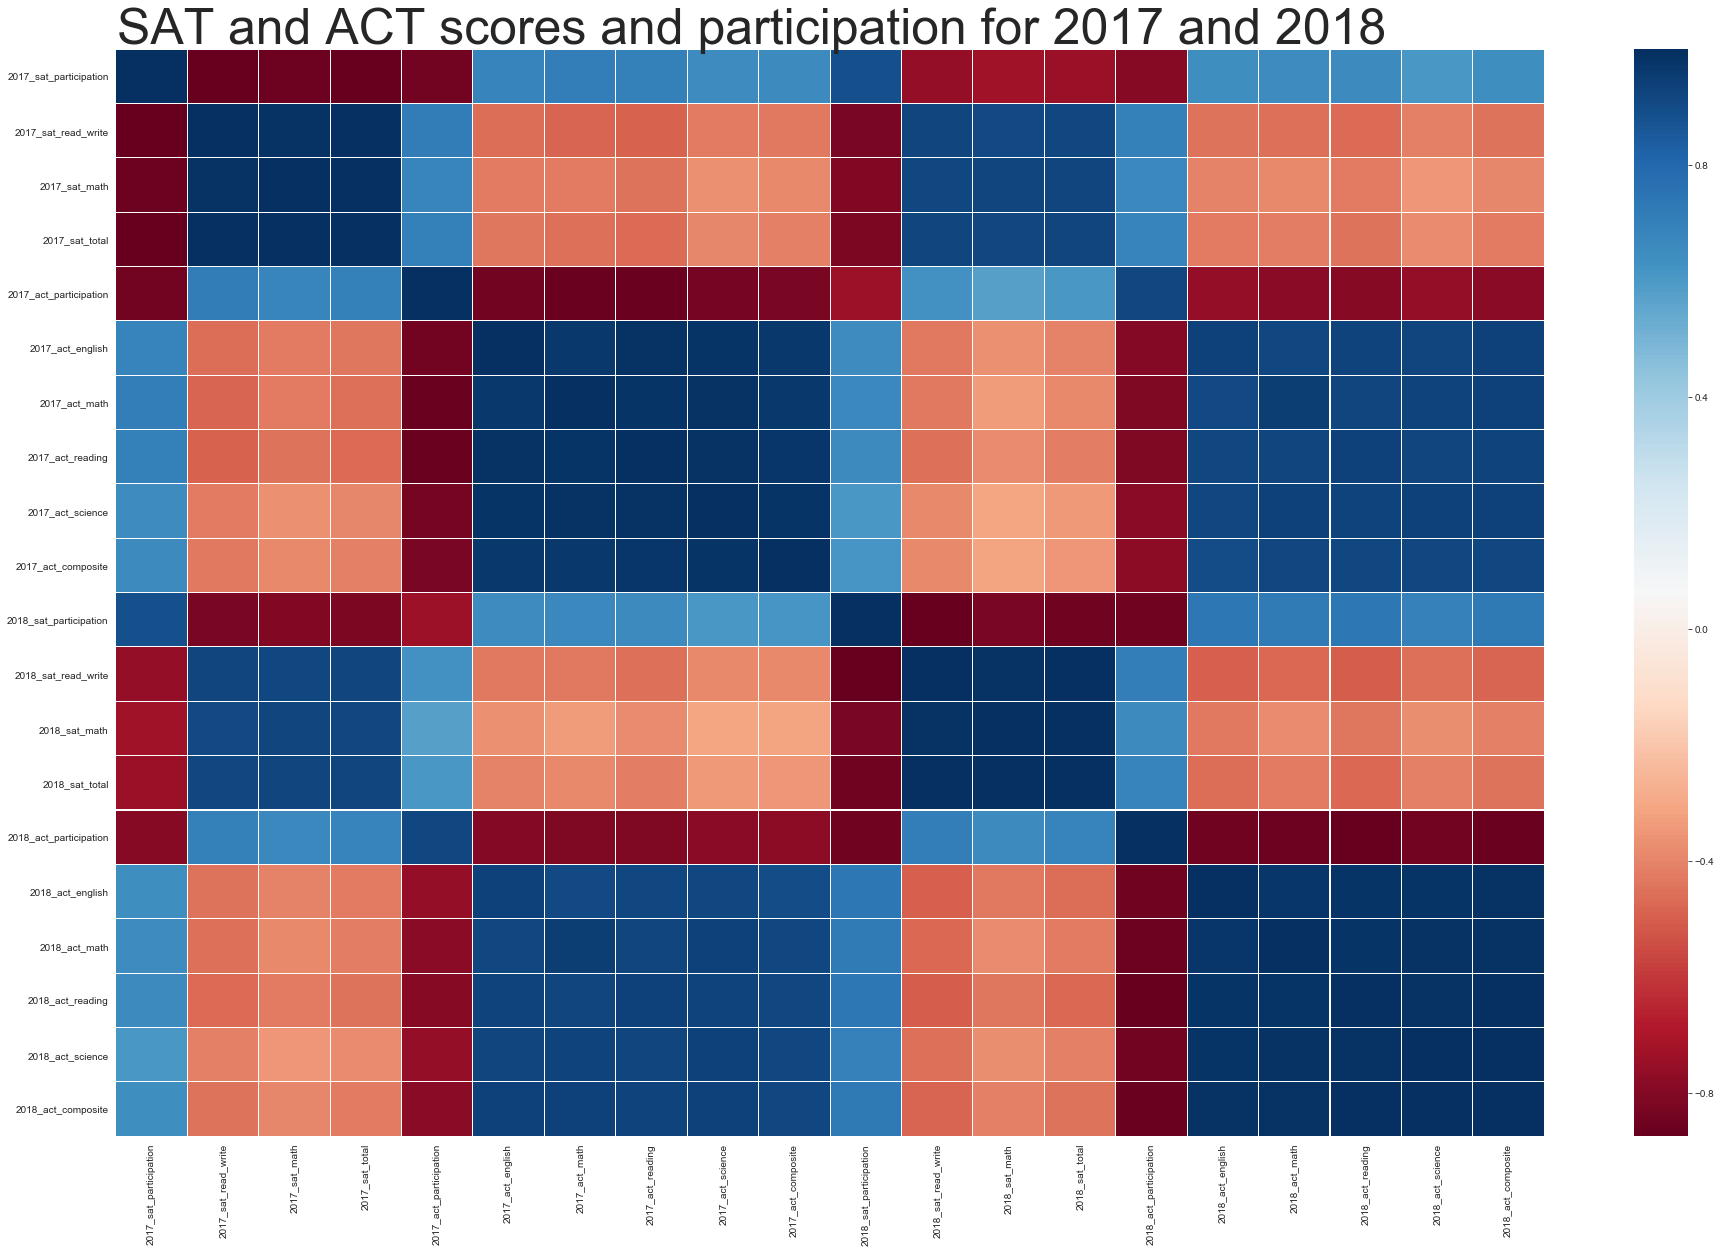

In [54]:
plt.figure(figsize = (32,20))

sns.heatmap(final_df.corr(), linewidths=0.1, linecolor='white', cmap='RdBu')

plt.title('SAT and ACT scores and participation for 2017 and 2018 ', fontsize=50, x=0.45, y=0.95)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(18,15)) # You'll want to specify your figsize
    plt.grid(b=True, which='major', color='#666666', linestyle='-') 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color=list_of_colors[i]) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=16)
        ax[i].set_title(list_of_titles[i], fontsize=28)# Set titles, labels, etc here for each subplot
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

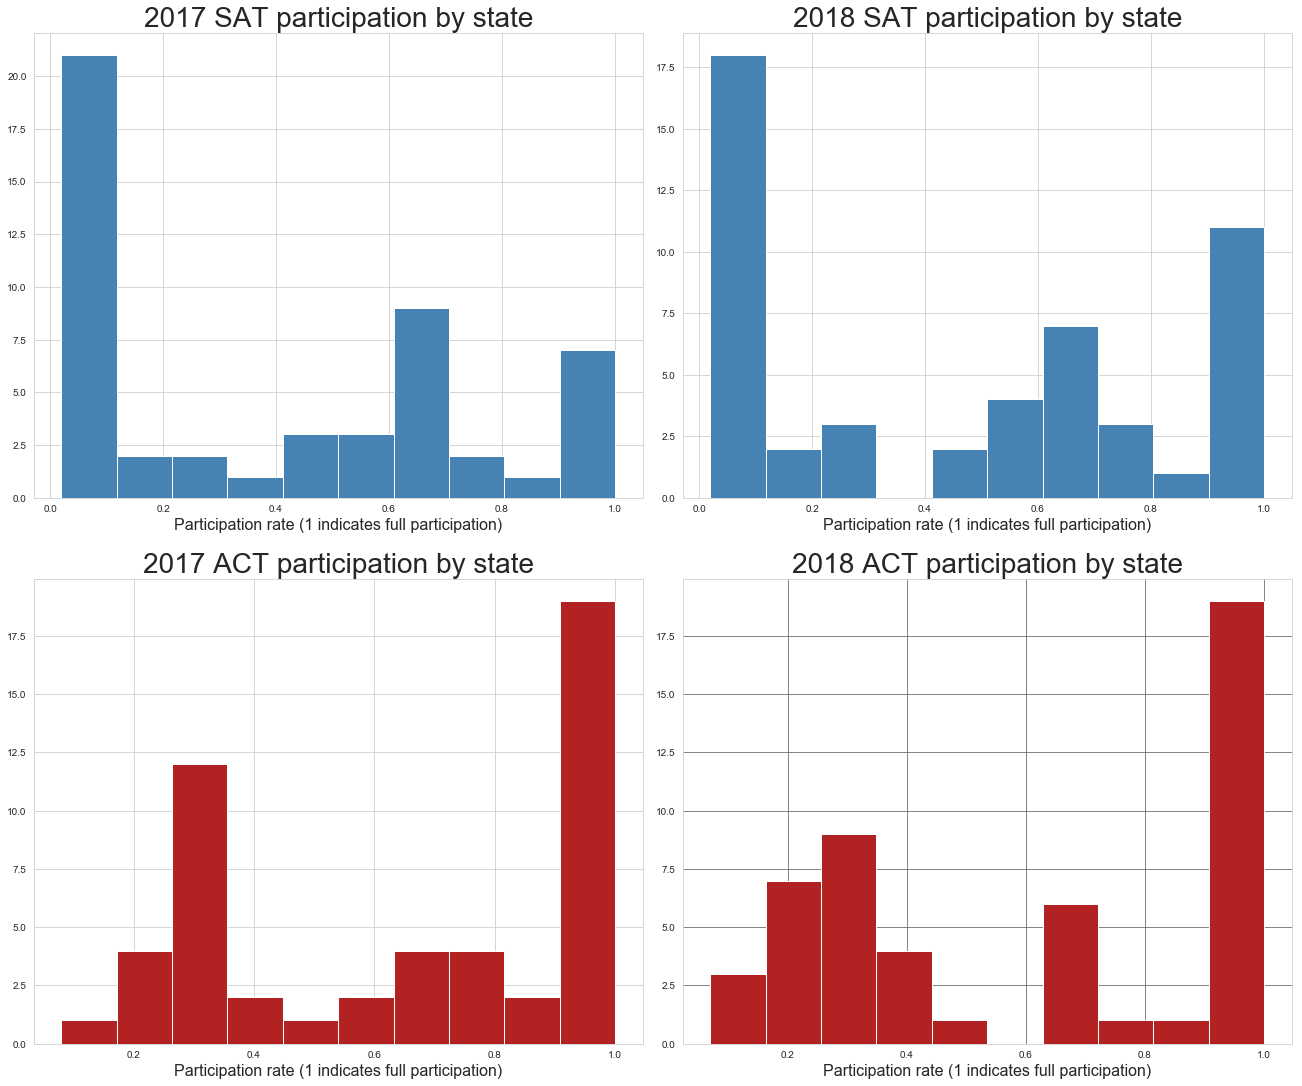

In [56]:
# Code SAT and ACT participation rates
subplot_histograms(final_df, 
                   ['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_participation'], 
                   ['2017 SAT participation by state','2018 SAT participation by state','2017 ACT participation by state','2018 ACT participation by state'], 
                   ['Participation rate (1 indicates full participation)','Participation rate (1 indicates full participation)','Participation rate (1 indicates full participation)','Participation rate (1 indicates full participation)'],
                   ['#4682B4', '#4682B4', '#B22222', '#B22222'])
plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

Participation rates in ACT are higher, with more states having 100% participation in ACT than in SAT. Participation below 10% is also much more prevalent in SAT than in ACT. 

However, participation in SAT picked up in 2018, with more states achieving 100% participation and fewer states with less than 10% participation. 

It is important to note that though more states have 100% participation in ACT for both years, [the SAT became the most widely used college admissions test in 2018](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?noredirect=on&utm_term=.8cb996e56424) for the first time since it lost that position to the ACT in 2012. This is possible because the states where the ACT is popular are less populated than the states where the SAT is favored. 

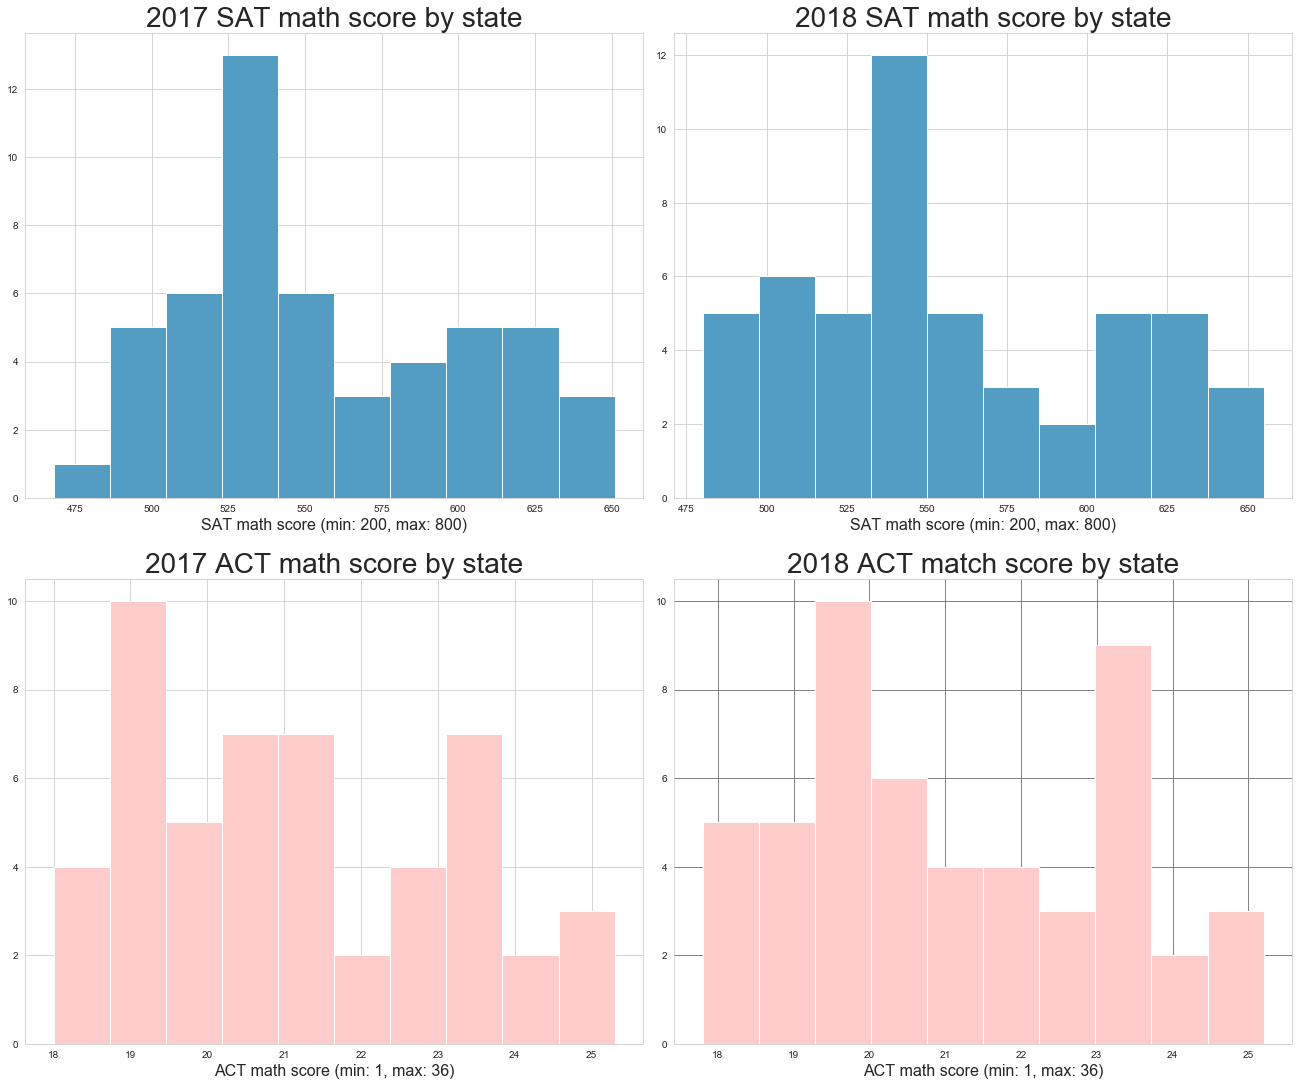

In [57]:
# Code SAT and ACT math scores
subplot_histograms(final_df, 
                   ['2017_sat_math','2018_sat_math','2017_act_math','2018_act_math'], 
                   ['2017 SAT math score by state','2018 SAT math score by state','2017 ACT math score by state','2018 ACT match score by state'], 
                   ['SAT math score (min: 200, max: 800)','SAT math score (min: 200, max: 800)','ACT math score (min: 1, max: 36)','ACT math score (min: 1, max: 36)'],
                   ['#539DC2', '#539DC2', '#FFCCCC','#FFCCCC'])
plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

There appears to be not much change in math performance between 2017 and 2018 for both tests. This is also no obvious difference in math performance between ACT and SAT takers. Although the SAT histograms show a more obvious peak than the ACT histograms, more exploration through other visualizations is required to draw a strong conclusion.

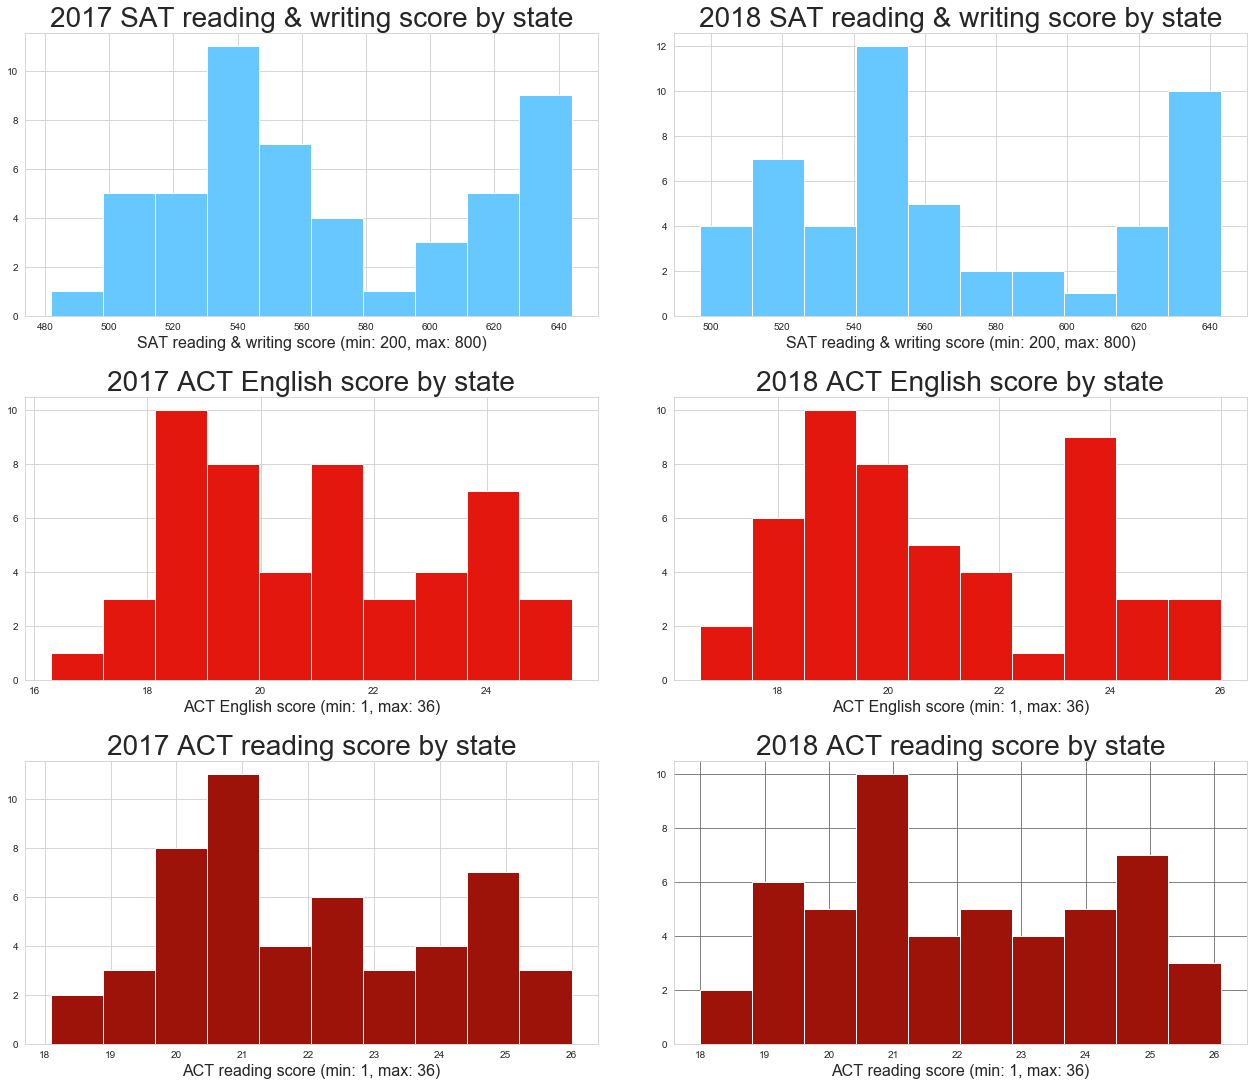

In [58]:
# Code SAT and ACT read/write, English, and reading scores
subplot_histograms(final_df, 
                   ['2017_sat_read_write','2018_sat_read_write','2017_act_english','2018_act_english','2017_act_reading','2018_act_reading'], 
                   ['2017 SAT reading & writing score by state','2018 SAT reading & writing score by state','2017 ACT English score by state','2018 ACT English score by state','2017 ACT reading score by state','2018 ACT reading score by state'], 
                   ['SAT reading & writing score (min: 200, max: 800)','SAT reading & writing score (min: 200, max: 800)','ACT English score (min: 1, max: 36)','ACT English score (min: 1, max: 36)','ACT reading score (min: 1, max: 36)','ACT reading score (min: 1, max: 36)'],
                   ['#67C8FF', '#67C8FF', '#E3170D', '#E3170D', '#9D1309', '#9D1309'])

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2)

Again, there does not appear to be not much change in performance in the reading and writing, English, and reading sections between 2017 and 2018 for both tests. There seems to be more high performers in the SAT reading and writing section than in either the ACT English or reading sections. But because the histograms do not show an obvious trend, it is advisable to do more exploration through other visualizations if we want to reach a strong conclusion.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'SAT vs ACT math scores for 2017')

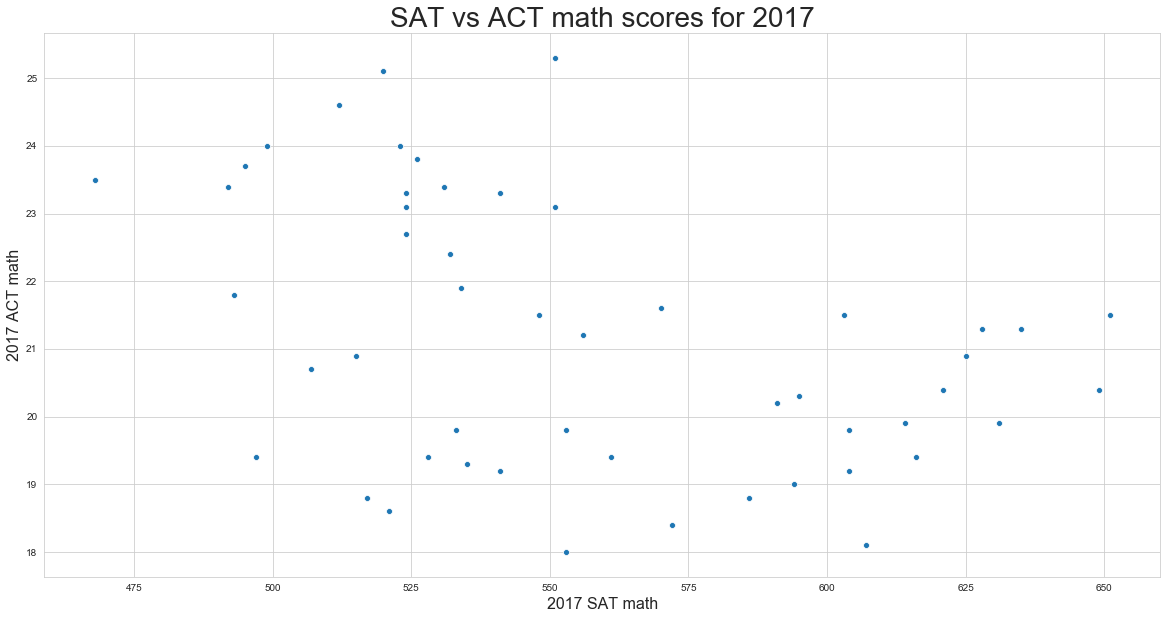

In [59]:
#SAT vs. ACT math scores for 2017
fig, ax = plt.subplots(figsize=(20,10)) 

sns.scatterplot(x='2017_sat_math',y='2017_act_math',data=final_df, ax=ax)

ax.set_xlabel('2017 SAT math', fontsize=16)
ax.set_ylabel('2017 ACT math', fontsize=16)
ax.set_title('SAT vs ACT math scores for 2017', fontsize=28)


The plot shows a downward sloping trend, meaning that states that do well at SAT math tend to do worse at ACT math, and vice versa. This is logical as either the ACT or SAT is the main requirement in a state. For states where the ACT is required, ACT math scores reflect the general math ability of students in that state. Those who take the SAT in the same state choose to do so because they know they can do well and hence scores will be higher. States where the SAT is the requirement will see the reverse trend, with ACT math scores in the upper region while SAT math scores are in the lower region. 

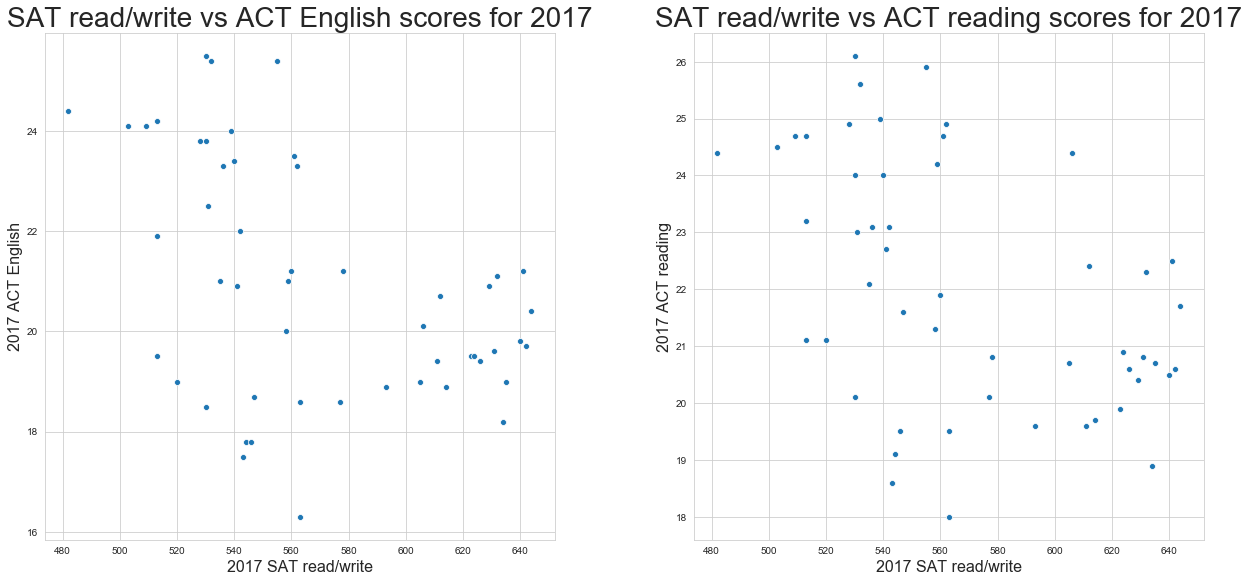

In [60]:
#Total scores for SAT 2017 vs 2018 next to Composite scores for ACT 2017 vs 2018

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8)) 

sns.scatterplot(x='2017_sat_read_write',y='2017_act_english',data=final_df, ax=ax1)
sns.scatterplot(x='2017_sat_read_write',y='2018_act_reading',data=final_df, ax=ax2)

ax1.set_xlabel('2017 SAT read/write', fontsize=16)
ax1.set_ylabel('2017 ACT English', fontsize=16)
ax1.set_title('SAT read/write vs ACT English scores for 2017', fontsize=28)

ax2.set_xlabel('2017 SAT read/write', fontsize=16)
ax2.set_ylabel('2017 ACT reading', fontsize=16)
ax2.set_title('SAT read/write vs ACT reading scores for 2017', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

The graphs above show the SAT reading and writing results for 2017 plotted against the 2017 scores of the ACT English and ACT reading tests, both of which assess language ability. The two graphs show a downward sloping trend for reasons as described above.

Viewing the graphs side by side, there is no major difference when comparing either the ACT English or ACT reading to the SAT reading and writing test. This suggests that those who do well on ACT English also tend to do well on ACT reading.

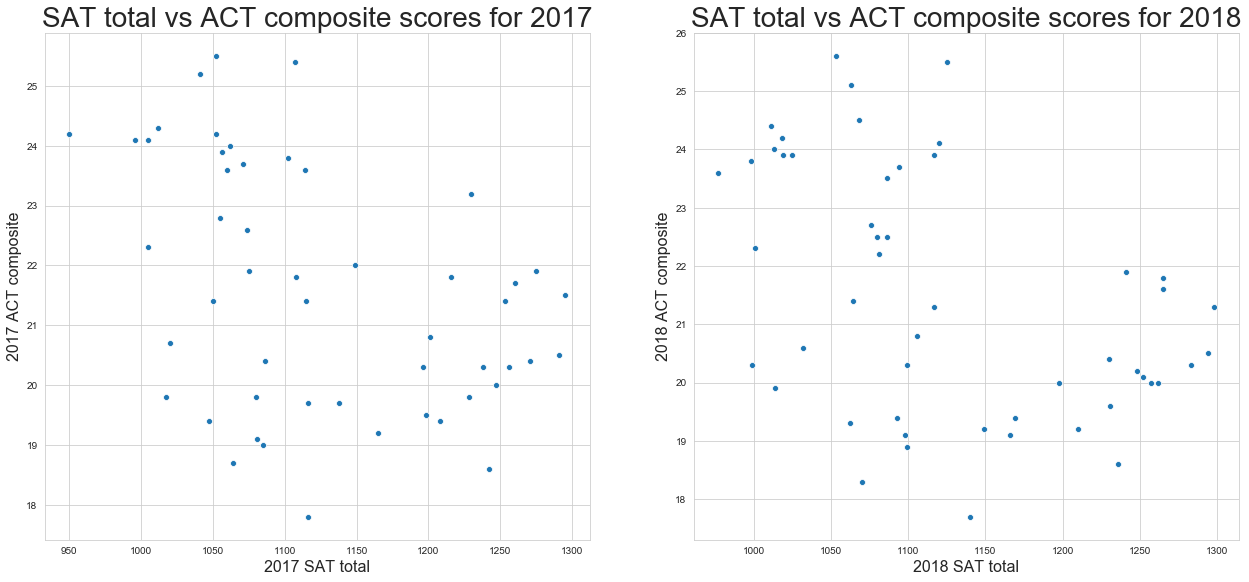

In [61]:
#SAT vs ACT total/composite scores for 2017 and 2018

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8)) 

sns.scatterplot(x='2017_sat_total',y='2017_act_composite',data=final_df, ax=ax1)
sns.scatterplot(x='2018_sat_total',y='2018_act_composite',data=final_df, ax=ax2)

ax1.set_xlabel('2017 SAT total', fontsize=16)
ax1.set_ylabel('2017 ACT composite', fontsize=16)
ax1.set_title('SAT total vs ACT composite scores for 2017', fontsize=28)

ax2.set_xlabel('2018 SAT total', fontsize=16)
ax2.set_ylabel('2018 ACT composite', fontsize=16)
ax2.set_title('SAT total vs ACT composite scores for 2018', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

Comparing SAT total and ACT composite scores, we again see a downward sloping trend for both years, because of the reason stated above: one test is usually the requirement in the state, and those who take the other have chosen to do so. 

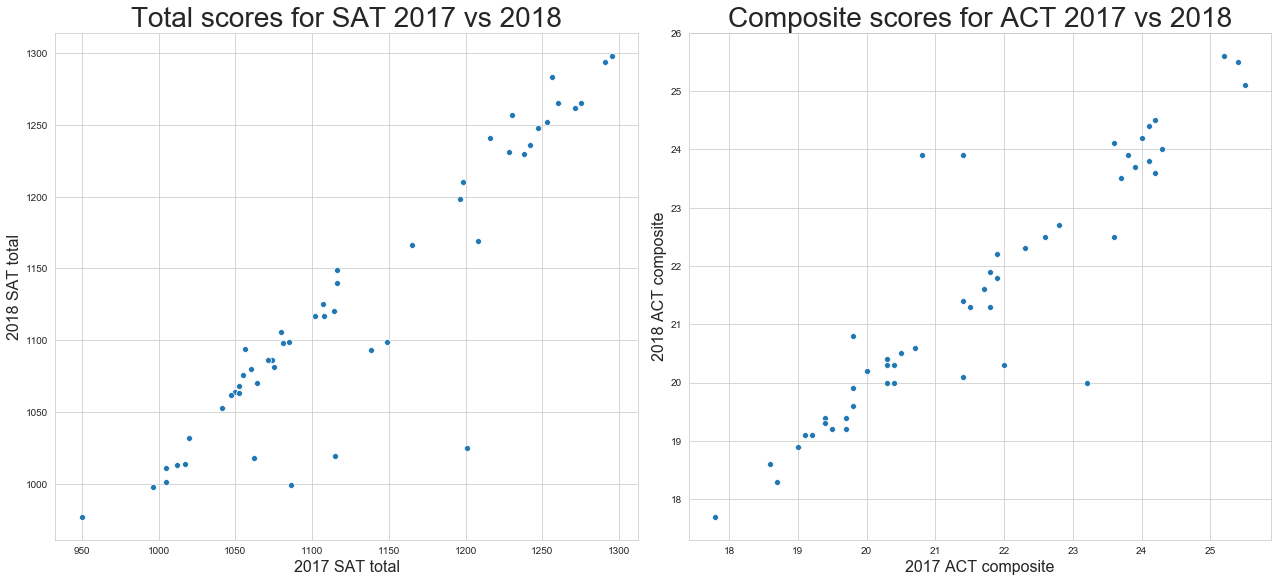

In [62]:
#Total scores for SAT 2017 vs 2018 next to composite scores for ACT 2017 vs 2018'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8)) 

sns.scatterplot(x='2017_sat_total',y='2018_sat_total',data=final_df, ax=ax1)
sns.scatterplot(x='2017_act_composite',y='2018_act_composite',data=final_df, ax=ax2)

ax1.set_xlabel('2017 SAT total', fontsize=16)
ax1.set_ylabel('2018 SAT total', fontsize=16)
ax1.set_title('Total scores for SAT 2017 vs 2018', fontsize=28)

ax2.set_xlabel('2017 ACT composite', fontsize=16)
ax2.set_xlabel('2017 ACT composite', fontsize=16)
ax2.set_ylabel('2018 ACT composite', fontsize=16)
ax2.set_title('Composite scores for ACT 2017 vs 2018', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

Year-to-year SAT total scores comparison shows a generally linear trend, meaning that states scored close to how they did the previous year. There are some data points below the trend line, indicating that several states' performances worsened in 2018 significantly. In particular, one state went from about 1200 in 2017 to less than 1050 in 2018.
It is notable that no states improved significantly enough to appear significantly above the trend line.

Year-to-year ACT composite scores comparison display a similar trend line showing that states also scored close to how they did the previous year. However, the ACT plot appears to show fewer states significantly below the trend line. Moreover, there are states that improved performance such that they appear significantly above the trend line.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [63]:
def box_plotter(list_of_columns, list_of_colors, title, xlabel, ylabel):
    plt.figure(figsize=(18,10))
    participation = sns.boxplot(data=final_df[list_of_columns])
    for i, column in enumerate(list_of_columns):
        participation.artists[i].set_facecolor(list_of_colors[i])
    plt.title(title, fontsize=28)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

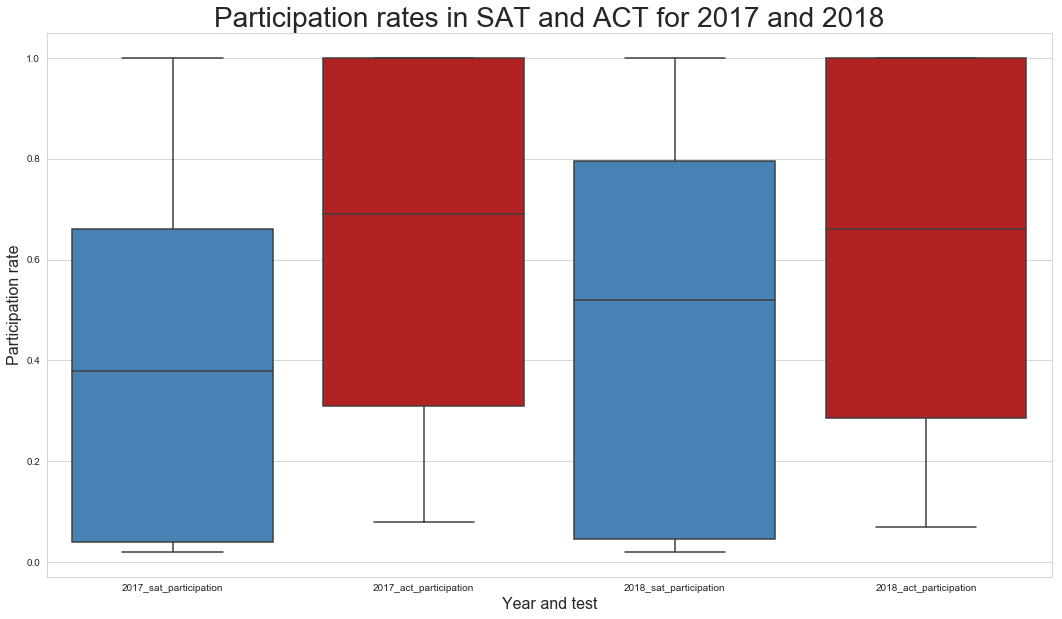

In [64]:
#Participation rates in SAT and ACT for 2017 and 2018
box_plotter(['2017_sat_participation', '2017_act_participation', '2018_sat_participation', '2018_act_participation'],
             ['#4682B4','#B22222','#4682B4','#B22222'],
             'Participation rates in SAT and ACT for 2017 and 2018',
             'Year and test',
             'Participation rate')

More states have higher ACT participation rates than SAT participation rates. ACT median is above 60% for both years. There are no upper whiskers for ACT boxplots because the upper quartile is at the maximum 100% participation. Indeed, about one-thirds of states had 100% ACT participation in 2017 and 2018.

Still, SAT median did improve from below 40% in 2017 to mid-50% in 2018, and the 75th percentile improved from below 70% to almost 80%. 

It is important to note that though more states have 100% participation in ACT for both years, [the SAT became the most widely used college admissions test in 2018](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?noredirect=on&utm_term=.8cb996e56424) for the first time since it lost that position to the ACT in 2012. This is possible because the states where the ACT is popular are less populated than the states where the SAT is favored.

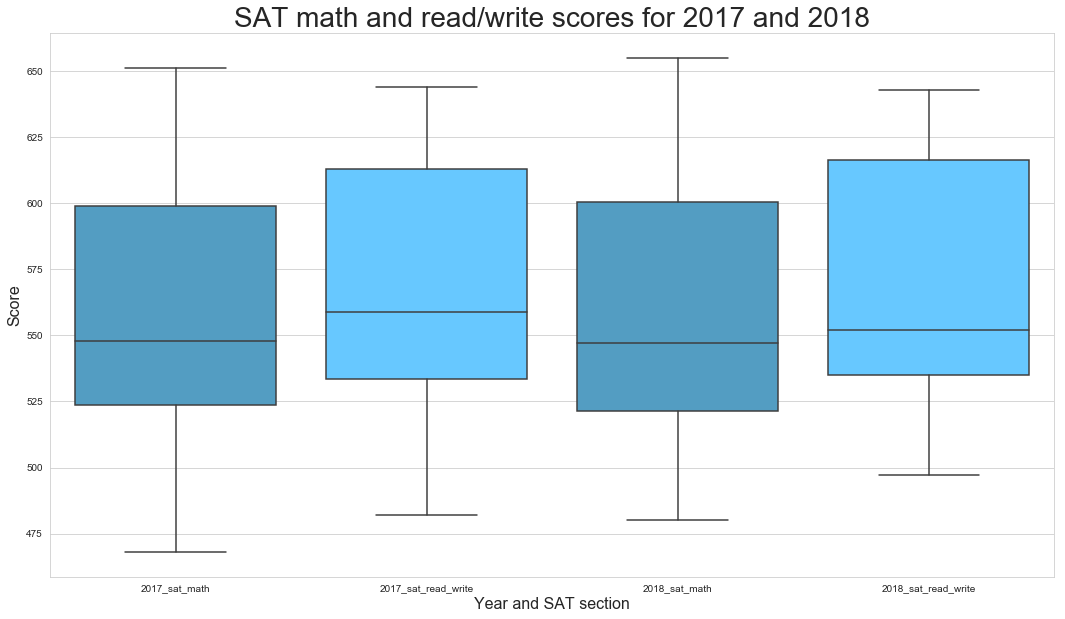

In [65]:
#SAT math and read/write scores for 2017 and 2018
box_plotter(['2017_sat_math', '2017_sat_read_write', '2018_sat_math', '2018_sat_read_write'],
             ['#539DC2','#67C8FF','#539DC2','#67C8FF'],
             'SAT math and read/write scores for 2017 and 2018',
             'Year and SAT section',
             'Score')

Students did better in the SAT reading and writing section than the math section for both years. But reading and writing performance dipped in 2018, with a visible lowering of the median. Math performance is consistent across both years, with very similar interquartile ranges.

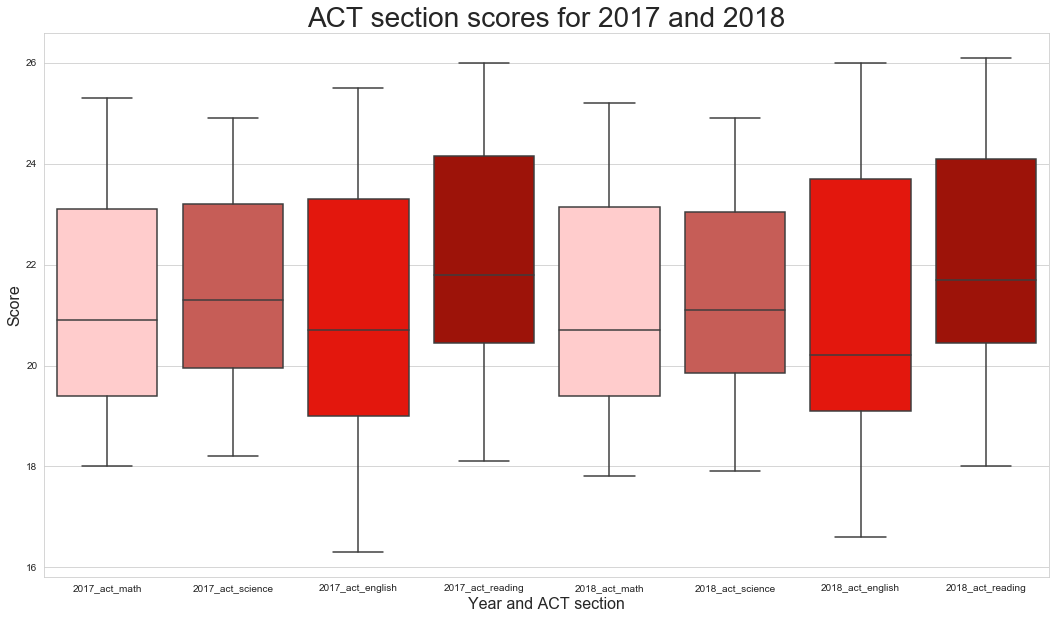

In [66]:
#SAT math and read/write scores for 2017 and 2018
box_plotter(['2017_act_math', '2017_act_science', '2017_act_english', '2017_act_reading','2018_act_math', '2018_act_science', '2018_act_english', '2018_act_reading'],
             ['#FFCCCC','#C65D57','#E3170D','#9D1309','#FFCCCC','#C65D57','#E3170D','#9D1309'],
             'ACT section scores for 2017 and 2018',
             'Year and ACT section',
             'Score')

Students' performance in the reading section is the best, with the highest median and maximum for both years. It is interesting to note that the English median is lower than the math and science medians for both years, suggesting that the English and reading sections are significantly different despite both being about language ability. 

Performance is largely consistent across both years, with the exception of a noticeable dip in the median for reading. 

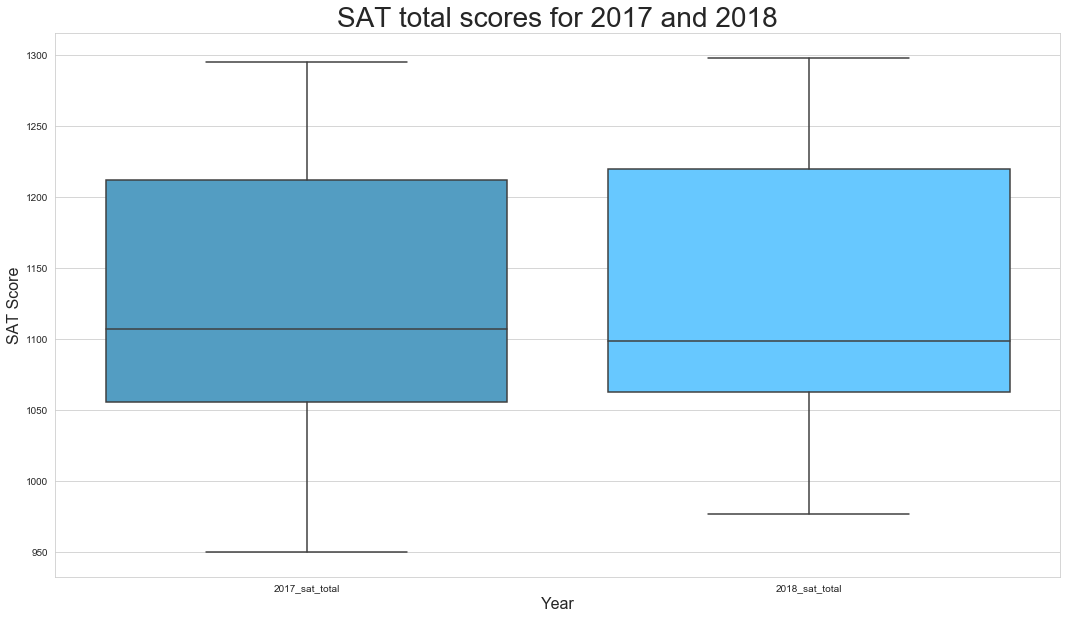

In [67]:
# SAT total scores for 2017 and 2018
box_plotter(['2017_sat_total', '2018_sat_total'],
             ['#539DC2','#67C8FF'],
             'SAT total scores for 2017 and 2018',
             'Year',
             'SAT Score')

The biggest change for SAT total scores is in the first quartile, with both a higher minimum and higher 25th percentile. Although the median dipped a little, the 75th percentile and the maximum both rose slightly. 

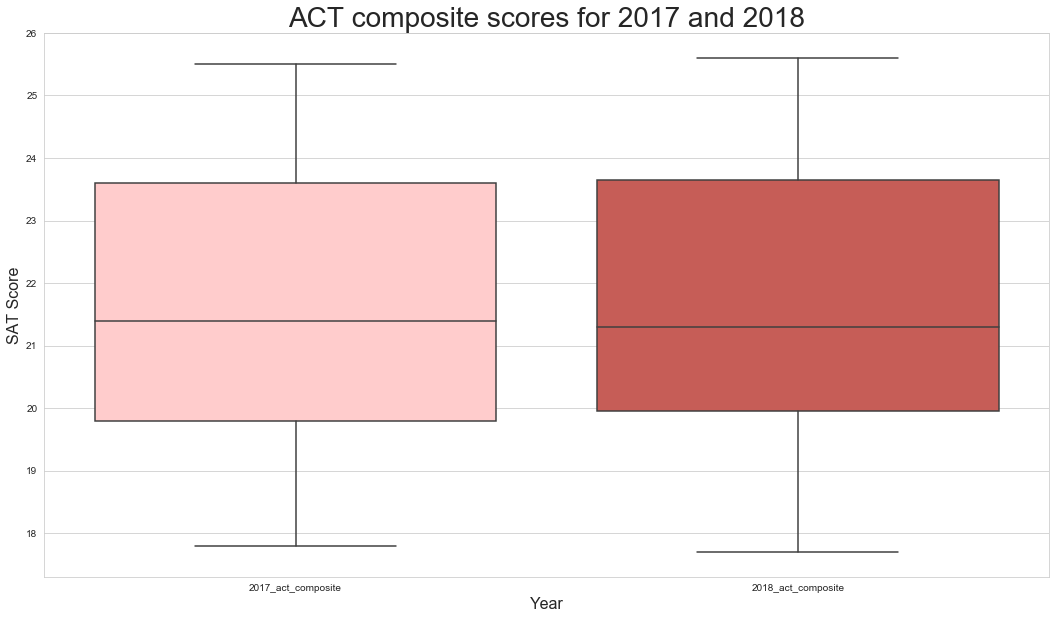

In [68]:
# ACT composite scores for 2017 and 2018
box_plotter(['2017_act_composite', '2018_act_composite'],
             ['#FFCCCC','#C65D57'],
             'ACT composite scores for 2017 and 2018',
             'Year',
             'SAT Score')

ACT composite scores are largely consistent across both years. While the 25th percentile and the maximum rose slightly in 2018, the minimum also dipped in the same year.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

As participation rates are the main variables analyzed, four maps representing SAT and ACT participation rates in 2017 and 2018 have been produced.

![SAT and ACT participation 2017 and 2018](../images/sat_act_participation_2017_2018.png "SAT and ACT participation 2017 and 2018")

From the map visualizations, again we see the stark increase in SAT participation from 2017 to 2018.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [69]:
#participation rate statistics
final_df[['2017_sat_participation','2017_act_participation','2018_sat_participation','2018_act_participation']].describe()

,2017_sat_participation,2017_act_participation,2018_sat_participation,2018_act_participation
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,0.652549,0.466275,0.616471
std,0.352766,0.321408,0.380142,0.340810
min,0.020000,0.080000,0.020000,0.070000
25%,0.040000,0.310000,0.045000,0.285000
50%,0.380000,0.690000,0.520000,0.660000
75%,0.660000,1.000000,0.795000,1.000000
max,1.000000,1.000000,1.000000,1.000000


#### Participation rate statistics

SAT central tendency for 2017(mean: 0.398039, median: 0.380000) shifted significantly to the right in 2018(mean: 0.466275, median: 0.520000).

ACT central tendency for 2017(mean: 0.652549, median: 0.690000) did not shift as much in 2018(mean: 0.616471, median: 0.660000). The mode for both years is also 1.00.

The spreads for all variables are high, with standard deviations above 0.30 and ranges that cover almost all possible values. 

In [70]:
#SAT math and read/write statistics 
final_df[['2017_sat_math', '2017_sat_read_write', '2018_sat_math', '2018_sat_read_write']].describe()

,2017_sat_math,2017_sat_read_write,2018_sat_math,2018_sat_read_write
count,51.000000,51.000000,51.000000,51.000000
mean,556.882353,569.117647,557.254902,567.294118
std,47.121395,45.666901,48.887562,45.317676
min,468.000000,482.000000,480.000000,497.000000
25%,523.500000,533.500000,521.500000,535.000000
50%,548.000000,559.000000,547.000000,552.000000
75%,599.000000,613.000000,600.500000,616.500000
max,651.000000,644.000000,655.000000,643.000000


#### SAT section scores statistics

SAT math central tendency for 2017 is to slightly to the right(mean: 556.882353, median: 548.000000), and remained steady in 2018(mean: 557.254902, median: 547.000000).

SAT read/write central tendencies are to the right for 2017(mean: 569.117647, median: 559.000000) and 2018(mean: 567.294118, median: 552.000000).

The ranges for all variables are between 450 and 655, with standard deviations between 45 and 49. 

In [71]:
#ACT section score statistics 
final_df[['2017_act_math', '2017_act_science', '2017_act_english', '2017_act_reading', '2018_act_math', '2018_act_science', '2018_act_english', '2018_act_reading']].describe()

,2017_act_math,2017_act_science,2017_act_english,2017_act_reading,2018_act_math,2018_act_science,2018_act_english,2018_act_reading
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,21.182353,21.450980,20.931373,22.013725,21.125490,21.341176,20.988235,22.033333
std,1.981989,1.739353,2.353677,2.067271,2.035765,1.870206,2.446356,2.164132
min,18.000000,18.200000,16.300000,18.100000,17.800000,17.900000,16.600000,18.000000
25%,19.400000,19.950000,19.000000,20.450000,19.400000,19.850000,19.100000,20.450000
50%,20.900000,21.300000,20.700000,21.800000,20.700000,21.100000,20.200000,21.700000
75%,23.100000,23.200000,23.300000,24.150000,23.150000,23.050000,23.700000,24.100000
max,25.300000,24.900000,25.500000,26.000000,25.200000,24.900000,26.000000,26.100000


#### ACT section scores statistics

Central tendency for ACT sections are tightly clustered for both years(mean: 20.9-22, median: 20.2-21.8). 

Spreads for the eight variables are similar, with standard deviations between 1.8 and 2.4.  

In [72]:
#SAT total score statistics 
final_df[['2017_sat_total', '2018_sat_total']].describe()

,2017_sat_total,2018_sat_total
count,51.000000,51.000000
mean,1126.098039,1124.666667
std,92.494812,93.868561
min,950.000000,977.000000
25%,1055.500000,1062.500000
50%,1107.000000,1099.000000
75%,1212.000000,1220.000000
max,1295.000000,1298.000000


#### SAT total  scores statistics

Central tendency for 2017(mean: 1126.098039, median: 1107) and 2018 are close(mean: 1124.666667, median: 1124.666667).

Spreads for 2017(standard deviation: 92.494812, range: 950-1295) and 2018(standard deviation: 93.868561, range: 977-1298) are also similar.

In [73]:
#ACT composite score statistics 
final_df[['2017_act_composite', '2018_act_composite']].describe()

,2017_act_composite,2018_act_composite
count,51.000000,51.000000
mean,21.578431,21.498039
std,2.025173,2.117686
min,17.800000,17.700000
25%,19.800000,19.950000
50%,21.400000,21.300000
75%,23.600000,23.650000
max,25.500000,25.600000


#### ACT composite  scores statistics

Central tendency for 2017(mean: 21.519608, median: 21.4) and 2018 are close(mean: 21.498039, median: 21.300000).

Spreads for 2017(standard deviation: 2.020695, range: 17.8-25.5) and 2018(standard deviation: 2.117686, range: 17.7-25.6) are also similar.

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Judging by the histograms, the participation rates do not follow the normal distribution at all, and that is to be expected because participation is dictated by state regulations, resulting in many extremely low or extremely high values.  

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: As explained above, the participation rates do not follow the normal distribution. 

The histograms for math and reading sections of both tests bear more resemblance to the normal distribution, but the shapes are still skewed to the left or right, with peaks that are not central or even multiple peaks. This could be due to the fact that many test takers are those who choose to do. They will likely be highly motivated and well prepared, producing a large number of high scorers and skewing the data to the right.  

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer: We can conduct statistical inference but only for variables that are comparable. It will be most appropriate to compare the same variables across years as they will be on the same scale and we can estimate if the increase or decrease is statistically significant. Variables of the same class, for example 2017 SAT math and 2018 SAT math, can also be more confidently assumed to be following the same distribution, as shown in the histograms above.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Is is not appropriate because the SAT and ACT scores are on different scales (SAT:200-800, ACT:1-36).

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

### Experiment 1: On different performance between 2017 SAT math and 2018 SAT math scores

---


> **H0:** The difference in performance between 2017 SAT math score and 2018 SAT math score is 0.

> **H1:** The difference in performance between 2017 SAT math score and 2018 SAT math score is not 0.

Set $\alpha$ = 0.05


In [74]:
# Code: compare SAT math scores for 2017 and 2018

sat_math_2017 = final_df['2017_sat_math'].to_numpy()
sat_math_2018 = final_df['2018_sat_math'].to_numpy()

In [75]:
import scipy.stats as stats
result = stats.ttest_ind(sat_math_2017, sat_math_2018)
result.statistic, result.pvalue

(-0.0391830543071512, 0.9688225636888137)

$p$ = 0.969

Since $p > \alpha$, there is insufficient evidence to reject the null hypothesis, and we conclude there is no statistical difference between 2017 SAT math and 2018 math performance.

### Experiment 2: On different performance between 2017 SAT read/write and 2018 SAT read/write scores

---


> **H0:** The difference in performance between 2017 SAT read/write score and 2018 SAT read/write score is 0.

> **H1:** The difference in performance between 2017 SAT read/write score and 2018 SAT read/write score is not 0.

Set $\alpha$ = 0.05

In [76]:
# Code: compare SAT math scores for 2017 and 2018

sat_read_write_2017 = final_df['2017_sat_read_write'].to_numpy()
sat_read_write_2018 = final_df['2018_sat_read_write'].to_numpy()

In [77]:
result = stats.ttest_ind(sat_read_write_2017, sat_read_write_2018)
result.statistic, result.pvalue

(0.2024146196266415, 0.8400038425905317)

$p$ = 0.840

Since $p > \alpha$, there is insufficient evidence to reject the null hypothesis, and we conclude there is no statistical difference between 2017 SAT read/write and 2018 read/write total performance.

### Experiment 3: On different performance between 2017 SAT total and 2018 SAT total scores

---


> **H0:** The difference in performance between 2017 SAT total score and 2018 SAT total score is 0.

> **H1:** The difference in performance between 2017 SAT total score and 2018 SAT total score is not 0.

Set $\alpha$ = 0.05

In [78]:
# Code: compare SAT total scores for 2017 and 2018 

sat_total_2017 = final_df['2017_sat_total'].to_numpy()
sat_total_2018 = final_df['2018_sat_total'].to_numpy()

In [79]:
result = stats.ttest_ind(sat_total_2017, sat_total_2018)
result.statistic, result.pvalue

(0.07756761006188564, 0.9383269993394229)

$p$ = 0.938

Since $p > \alpha$, there is insufficient evidence to reject the null hypothesis, and we conclude there is no statistical difference between 2017 SAT total and 2018 SAT total performance.

#### Conclusion on 2017 and 2018 SAT performance

After running three experiments, we find there is no statistical difference between 2017 and 2018 SAT peformance, whether between individual sections or total score.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

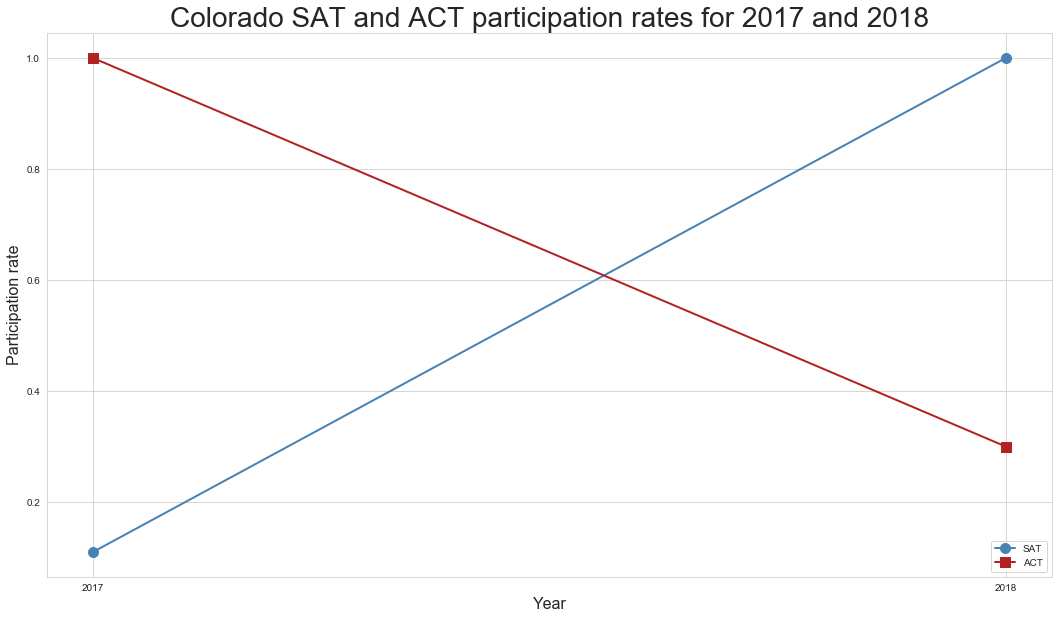

In [80]:
#Colorado SAT and ACT participation rates for 2017 and 2018
x = np.linspace(2017, 2018, 2)
sat_part_colo = final_df[['2017_sat_participation','2018_sat_participation']].loc[5]
act_part_colo = final_df[['2017_act_participation','2018_act_participation']].loc[5]
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(x, sat_part_colo, color='#4682B4', linewidth=2.00, marker='o', markersize=10)
ax.plot(x, act_part_colo, color='#B22222', linewidth=2.00, marker='s', markersize=10)

plt.title('Colorado SAT and ACT participation rates for 2017 and 2018', fontsize=28)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Participation rate', fontsize=16)
plt.xticks((2017,2018))
plt.legend(['SAT','ACT'])


In 2017, all Colorado high school juniors, who would be high school graduates in 2018, [took the SAT](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/) as part of the state's transition away from the ACT that was years in the making. Colorado's Department of Education [chose the SAT in 2015](https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/) after holding a competitive bid for college admission. This resulted in a steep spike in SAT participation from 11% in 2017 to 100% in 2018. Correspondingly, ACT participation plunged from 100% to 30%.

The College Board, which adminsters the SAT, teamed up with training providers such as the Khan Academy, to provide free SAT preparation for Colorado students, [according to the Denver Post](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/). 

News articles cited above also mention the revamp of the SAT to be more relevant to the US education curriculum, which may have played a role in persuading states to try out a repackaged SAT.

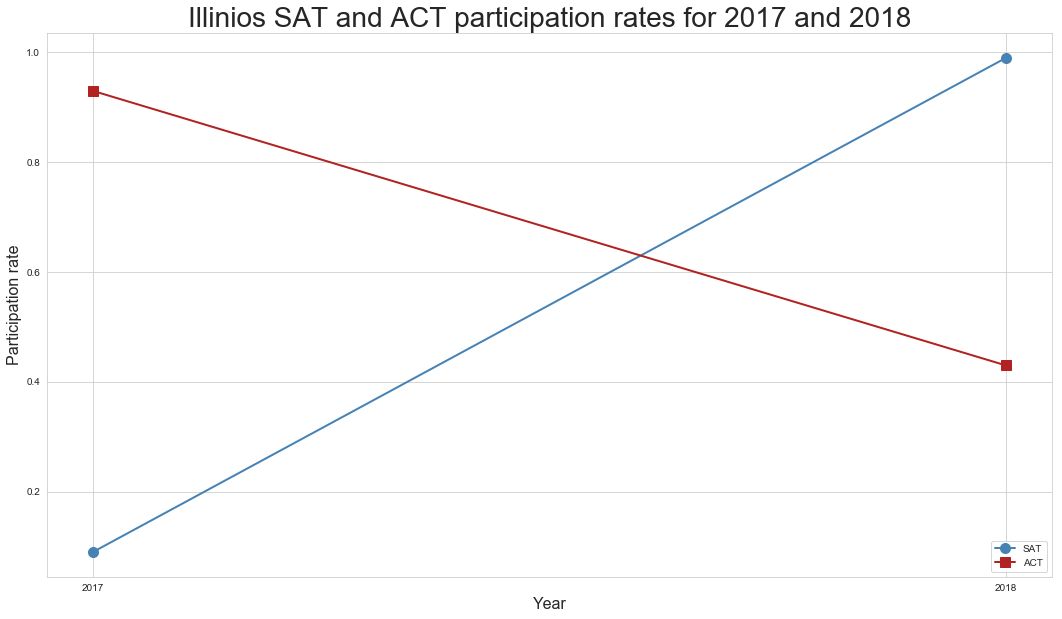

In [81]:
x = np.linspace(2017, 2018, 2)
sat_part_ill = final_df[['2017_sat_participation','2018_sat_participation']].loc[13]
act_part_ill = final_df[['2017_act_participation','2018_act_participation']].loc[13]
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(x, sat_part_ill, color='#4682B4', linewidth=2.00, marker='o', markersize=10)
ax.plot(x, act_part_ill, color='#B22222', linewidth=2.00, marker='s', markersize=10)

plt.title('Illinios SAT and ACT participation rates for 2017 and 2018', fontsize=28)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Participation rate', fontsize=16)
plt.xticks((2017,2018))
plt.legend(['SAT','ACT'], loc=4)

A similar change in state policy resulted in the same pattern of SAT/ACT participation rate change in Illinois. Like Colorado, [Illinois switched from the ACT to the SAT](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) as the requirement for all high school graduates. SAT participation went from 9% in 2017 to 99% in 2018. ACT participation nosedived from 93% to 43%. 

Illinois also joined the list of states offering the SAT [during school hours and for free](https://reports.collegeboard.org/sat-suite-program-results/sat-school-day), lowering the barriers to taking the test.

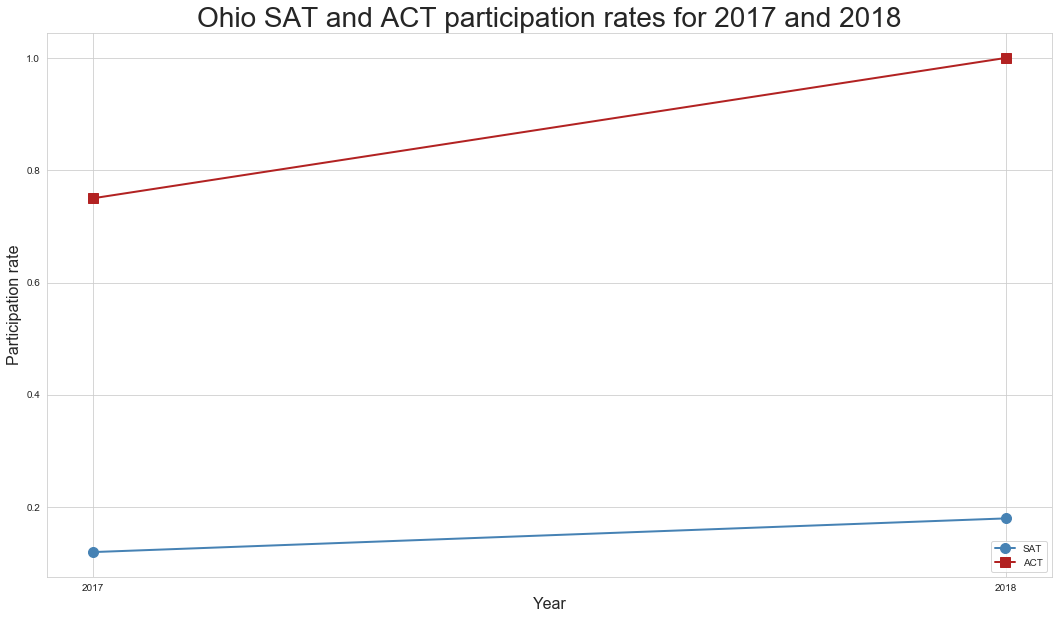

In [82]:
#Ohio SAT and ACT participation rates for 2017 and 2018
x = np.linspace(2017, 2018, 2)
sat_part_ohio = final_df[['2017_sat_participation','2018_sat_participation']].loc[35]
act_part_ohio = final_df[['2017_act_participation','2018_act_participation']].loc[35]
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(x, sat_part_ohio, color='#4682B4', linewidth=2.00, marker='o', markersize=10)
ax.plot(x, act_part_ohio, color='#B22222', linewidth=2.00, marker='s', markersize=10)

plt.title('Ohio SAT and ACT participation rates for 2017 and 2018', fontsize=28)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Participation rate', fontsize=16)
plt.xticks((2017,2018))
plt.legend(['SAT','ACT'], loc=4)

Ohio differs from the previous two examples as it bolstered its already considerable ACT participation from 75% in 2017 to 100% in 2018. Meanwhile, SAT participation grew modestly from 12% in 2017 to 18% in 2018. 

This change came after the state began requiring [all high school students to take either the SAT or ACT](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors) from 2017. Although officials allowed either tests, [about 95% of Ohio districts chose the ACT.](https://www.cleveland.com/metro/2018/10/more_ohio_students_took_the_ac.html)

As the ACT was already the more popular choice by far before the state requirement, it was only natural for districts to go with what was familiar. Also, [the ACT fee is slightly cheaper than the SAT fee,](https://www.cleveland.com/metro/2017/04/free_sat_or_act_exams_give_all.html) and this could have been a factor for budget-conscious administrators as schools have to provide the college admissions tests for free. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key takeaways and recommendations

* SAT scores improved in 2018 despite the spike in participation, while ACT scores have remained stagnant, as shown by the box plots. 
    * __Recommendation:__ Emphasize the improved performance in the SAT and in particular, the revamp to align the SAT with the US curriculum. 


* State rules have a large impact on whether students take the ACT or SAT.
    * __Recommendation:__ Target states that are due to review their college admissions provider. 


* Testing during school hours boosts participation rates.
    * __Recommendation:__ Negotiate school hours testing as part of package with states. 
    

* Consider matching the fee of ACT.
    * __Recommendation:__ This will lower barriers for budget-conscious administrators.
    
    
* Free testing is also a major incentive to participate as states pay for students to take the test. 
    * __Recommendation:__ Also include free testing as part of negotiation with states. 
    
    
* [Issues may arise](https://www.chalkbeat.org/posts/co/2016/01/07/school-executives-group-files-protest-against-states-switch-to-sat/) even after decision to switch has been made. 
    * __Recommendation:__ Continue lobbying effort to reiterate why the decision to switch was made in the first place. 


* __Additional data required:__
    * [List of states](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html) showing what college admission test is the current requirement.
    * List of states showing when they are due to review their college admissions provider. 
    * Data showing those who enter college using SAT result ultimately graduate with better GPA or better honors. 
    
__Conclusion__

Among states that currently mandate either the SAT or ACT, Ohio is the most populous state that has higher ACT participation. We can therefore aim to persuade administrators to conduct the SAT instead of ACT. Indeed, the groundwork has already been prepared. According to the [Ohio Department of Education](http://education.ohio.gov/Topics/Testing/State-Funded-SAT-Test), the state has already committed to funding the SAT. Although most Ohio districts chose the ACT, there was also modest growth in SAT participation, suggesting that districts and students are open to trying out the SAT.

There is tremendous potential for growth there and the College Board should reach out to Ohio districts to highlight the benefits of the SAT and persuade them to switch.